In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [9]:
DATA_PATH = "data.json"

def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y


In [10]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["acc"], label="train accuracy")
    axs[0].plot(history.history["val_acc"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [12]:
if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)



Data succesfully loaded!
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)      

6997/6997 [==============================] - 3s 461us/sample - loss: 2.5112 - acc: 0.2943 - val_loss: 2.5221 - val_acc: 0.3008
Epoch 47/100
6997/6997 [==============================] - 3s 463us/sample - loss: 2.4927 - acc: 0.3010 - val_loss: 2.4931 - val_acc: 0.3018
Epoch 48/100
6997/6997 [==============================] - 3s 462us/sample - loss: 2.4498 - acc: 0.3054 - val_loss: 2.4645 - val_acc: 0.2964
Epoch 49/100
6997/6997 [==============================] - 3s 461us/sample - loss: 2.4333 - acc: 0.3120 - val_loss: 2.4549 - val_acc: 0.2964
Epoch 50/100
6997/6997 [==============================] - 3s 460us/sample - loss: 2.4103 - acc: 0.3064 - val_loss: 2.4161 - val_acc: 0.3111
Epoch 51/100
6997/6997 [==============================] - 3s 466us/sample - loss: 2.3826 - acc: 0.3100 - val_loss: 2.3915 - val_acc: 0.3124
Epoch 52/100
6997/6997 [==============================] - 3s 465us/sample - loss: 2.3539 - acc: 0.3206 - val_loss: 2.3734 - val_acc: 0.3261
Epoch 53/100
6997/6997 [=========

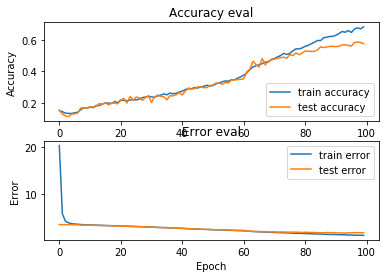

In [13]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [14]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2999/2999 - 0s - loss: 1.7483 - acc: 0.5775

Test accuracy: 0.57752585
